    Author: Eswar Lakshminarayanan

### Level B1

    In this notebook, we have performed k means clustering for level B1 data. Here Level B1 data means, people who have spent time only level B1 of the Art Galley 

#### Reading Entire Level B1 Data

In [1]:
import pandas as pd 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
df = pd.read_csv("../pre_processing11/levelB1_coordinates_only.csv",header=0)
df.head(3)

,lat,lng
0,1.290242,103.851585
1,1.290202,103.851555
2,1.290194,103.851585


In [2]:
df.shape

(40800859, 2)

### Intuitive method to come up with a range for (k) clusters

    - here we are plotting a heatmap for the level data using the below code. 
    - Since the size of the html file generated my heatmap is huge, it is not rendered on jupyter notebook but only on firefox browser
    - Here is the code that is used to generate the heatmap
    
```m = folium.Map(lat_lon[0][0:2], tiles='OpenStreetMap', zoom_start=20)
HeatMap(lat_lon,radius=7,max_zoom=28).add_to(m)
m.save('/home/opc/levelB1.html')```

    - Below is the picture of heatmap prdouced for level B1. 
    - The picture below clearly shows that there are around 8 to 10 spots wwhere the density is quite high
    


<img src="http://drive.google.com/uc?export=view&id=1X0TSdbPJPOJuvNoKn2l-wrWhOinIxcnA">


### Training kmeans model with different k values for clusters

In [3]:
centers_ = []
Sum_of_squared_distances = []
range_n_clusters = [6,7,8,10]
for n_clusters in range_n_clusters:
    print("number of clusters:", n_clusters)
    clusterer = KMeans (n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=1,precompute_distances='auto', random_state=3192, copy_x=True, n_jobs=1, algorithm='auto')
    clusterer.fit(df)
    centers = clusterer.cluster_centers_.tolist()
    centers_.append(centers)
    Sum_of_squared_distances.append(clusterer.inertia_)

number of clusters: 6
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 0.2717645533327246
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.2522405273726076
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.24523110817271845
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.2427163051331008
start iteration
done sorting
end inner loop
Iteration 4, inertia 0.24166380200886306
start iteration
done sorting
end inner loop
Iteration 5, inertia 0.24118699369313257
start iteration
done sorting
end inner loop
Iteration 6, inertia 0.24094170626820524
start iteration
done sorting
end inner loop
Iteration 7, inertia 0.24080652761937163
start iteration
done sorting
end inner loop
Iteration 8, inertia 0.24072971066541463
start iteration
done sorting
end inner loop
Iteration 9, inertia 0.2406866029399339
start iteration
done sorting
end inner loop
Iteration 10, inertia 0.2406594250018482
center shift 2.442299e-

### Plotting Inertia vs Number of Cluster(k)

    Inertia: Sum of squared distances of samples to their closest cluster center. Here, lower inertia means, the closer/tighter the cluster is. Based on the graph below, we will select the clusters with lowest inertia.

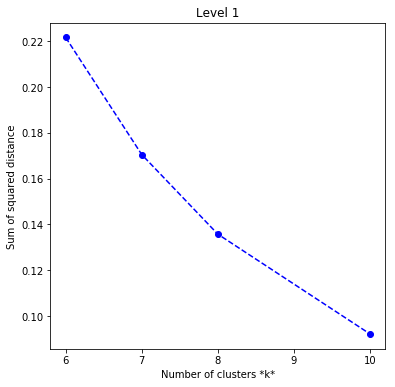

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, Sum_of_squared_distances,linestyle='--', marker='o', color='b')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters)+1, 1.0))
plt.title("Level 1")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig("level_lB1_elbow")
plt.show()

#### Here are the cluster centroids for the K clusters with minimum inertia
    
    In our case k = 10 has the minimum inertia, as you could see on the graph above

In [5]:
centroids = centers_[-1]
centroids

[[1.2901505322971618, 103.85151526415854],
 [1.290761314882777, 103.85183701616937],
 [1.2898866212491749, 103.85139324211389],
 [1.2903683538500839, 103.85163185742208],
 [1.2908584102736864, 103.8519792337393],
 [1.290061721528241, 103.85165098408669],
 [1.290055102350767, 103.85144672301637],
 [1.2906218405153758, 103.85173958428693],
 [1.2897596030983194, 103.85130943752183],
 [1.2902503772023322, 103.85156459994279]]

#### Now let's plot the centroids and see how close they are to high density areas in out heatmap 

In [9]:

m = folium.Map(centroids[0], tiles='OpenStreetMap', zoom_start=25)

for i in range(0,len(centroids)):
    folium.Circle(location=[centroids[i][0], centroids[i][1]],radius=5,color='crimson',fill=True,fill_color='crimson').add_to(m)
m


In [7]:
m.save('/home/opc/extra_space/pre_processing11/lB1_centroids.html')


### For comparsion purpose, plotting heatmap and clusters centroids side by side
    
    - As you can see most cluster centroids, overlap the high density areas on heatmap

  <tr>
    <td> <img src="http://drive.google.com/uc?export=view&id=1X0TSdbPJPOJuvNoKn2l-wrWhOinIxcnA" alt="Drawing" style="width: 500px;"/> </td>
    <td> <img src="http://drive.google.com/uc?export=view&id=1M6GrGfnObEmU3XE2rOAqXbCyQHDPDiph" alt="Drawing" style="width: 500px;"/> </td>
    </tr>
    